In [1]:
import spotipy
import requests
from app import config

sp = spotipy.Spotify(
        auth_manager=spotipy.SpotifyOAuth(
            username=config.SPOTIFY_USERNAME,
            scope=config.SPOTIFY_SCOPE))
token = sp.auth_manager.get_access_token(as_dict=False)
session = requests.Session()
session.headers.update({'Authorization': f'Bearer {token}'})

In [2]:
track_id='77KMttn3Lic7ZQKDlPqp8v'

In [3]:
response = session.get(config.API_CURRENT_PLAYING)
result = response.json()
track_id = result['item']['id']

In [4]:
print('track_id', track_id)

track_id 5q0bIE0KByf8FFA7S4L9WT


In [5]:
response = session.get(config.API_AUDIO_ANALYSIS + track_id)
result = response.json()

In [6]:
result.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

In [7]:
result['meta']

{'analyzer_version': '4.0.0',
 'platform': 'Linux',
 'detailed_status': 'OK',
 'timestamp': '1571439259',
 'analysis_time': 5.84275,
 'input_process': 'libvorbisfile L+R 44100->22050'}

In [8]:
result['track']

{'num_samples': '4277700',
 'duration': 194.0,
 'analysis_sample_rate': 22050.0,
 'analysis_channels': 1,
 'start_of_fade_out': 189.61415,
 'loudness': -8.127,
 'tempo': 120.111,
 'tempo_confidence': 0.293,
 'time_signature': 4,
 'time_signature_confidence': 0.963,
 'key': 9,
 'key_confidence': 0.385,
 'mode': 1,
 'mode_confidence': 0.371,
 'codestring': 'eJxNm4m1HbsNBFOZELgv-SfmquZ9-vaxZXHuLCTYaDQAaox7-p6rf-Uba-61-vnu-uac-5a9xlfnOt9ut5dezvhaHVy7c4_dx_pa7-sboy7-O-fX7s7wnLrP-vixfHuPdsqq_eubZ88upfHB_fUz_Og96-7zjcJnx6qnt3b5vu8t-47Ku7_lV8e4vPiW861exrf7XWfsUT_eeL5ezxjl8P1deXYPlsVf-HWc800e7ruxzj1dxShrrrIus6vtY65r7VLnd0op32nz3j1585n5dbd-NMzZvrmVcutt_btlYqnbKg-xgtsGf-wyay2tfXcyydNW3RtD8gO2uEyor1XmxzOVh1vjHWNtxlNbYQus1wrjzTzrqG3vdSpjTXvm2G0z-a_Whl1cU-1lNcYuc7TSBy_kfVVj77UxUm18r7kyJlZLdb-44NoYlb3n3vy1ZXWl3s7Vj9c2P8An-R4v7C6P1fbaR-VVfPqABD93L_cPFzQuE5rFX8b0T97PRNu4XDjax_2smIe72DXWtu5snQnOybJP752Z5veghfHhi_2rywUA0dbaaMx_Vd4PCue482Kq1Y5fxU51dcdZH-bk9sb8l8sDxQ00spd13cvvo13WOfl9u75V7lwX1NTt9nFttTmF_H

In [9]:
result['bars']

[{'start': 1.1403, 'duration': 2.00844, 'confidence': 0.567},
 {'start': 3.14874, 'duration': 1.98741, 'confidence': 0.384},
 {'start': 5.13615, 'duration': 1.95238, 'confidence': 0.684},
 {'start': 7.08853, 'duration': 1.98485, 'confidence': 0.2},
 {'start': 9.07338, 'duration': 2.00019, 'confidence': 0.51},
 {'start': 11.07357, 'duration': 1.99954, 'confidence': 0.78},
 {'start': 13.07311, 'duration': 2.00491, 'confidence': 0.414},
 {'start': 15.07802, 'duration': 1.98512, 'confidence': 0.355},
 {'start': 17.06314, 'duration': 1.50182, 'confidence': 0.526},
 {'start': 18.56497, 'duration': 2.0055, 'confidence': 0.485},
 {'start': 20.57046, 'duration': 1.99697, 'confidence': 0.959},
 {'start': 22.56743, 'duration': 1.97363, 'confidence': 0.562},
 {'start': 24.54106, 'duration': 1.97802, 'confidence': 0.634},
 {'start': 26.51908, 'duration': 1.99956, 'confidence': 0.143},
 {'start': 28.51864, 'duration': 1.99775, 'confidence': 0.463},
 {'start': 30.51639, 'duration': 1.99782, 'confiden

In [10]:
result['beats']


[{'start': 0.14143, 'duration': 0.49969, 'confidence': 0.687},
 {'start': 0.64112, 'duration': 0.49918, 'confidence': 0.258},
 {'start': 1.1403, 'duration': 0.50015, 'confidence': 0.092},
 {'start': 1.64045, 'duration': 0.50253, 'confidence': 0.111},
 {'start': 2.14298, 'duration': 0.50299, 'confidence': 0.176},
 {'start': 2.64597, 'duration': 0.50277, 'confidence': 0.11},
 {'start': 3.14874, 'duration': 0.50008, 'confidence': 0.198},
 {'start': 3.64882, 'duration': 0.49473, 'confidence': 0.25},
 {'start': 4.14355, 'duration': 0.49563, 'confidence': 0.227},
 {'start': 4.63918, 'duration': 0.49697, 'confidence': 0.137},
 {'start': 5.13615, 'duration': 0.49116, 'confidence': 0.057},
 {'start': 5.62731, 'duration': 0.48446, 'confidence': 0.107},
 {'start': 6.11178, 'duration': 0.48558, 'confidence': 0.166},
 {'start': 6.59736, 'duration': 0.49117, 'confidence': 0.141},
 {'start': 7.08853, 'duration': 0.49698, 'confidence': 0.125},
 {'start': 7.58551, 'duration': 0.49721, 'confidence': 0.2

In [11]:
result['sections']

[{'duration': 8.57615,
  'confidence': 1.0,
  'loudness': -17.434,
  'tempo': 120.8,
  'tempo_confidence': 0.202,
  'key': 8,
  'key_confidence': 0.002,
  'mode_confidence': 0.048,
  'time_signature': 4,
  'time_signature_confidence': 1.0},
 {'start': 8.57615,
  'duration': 63.95012,
  'confidence': 0.62,
  'loudness': -8.517,
  'tempo': 120.053,
  'tempo_confidence': 0.571,
  'key': 9,
  'key_confidence': 0.443,
  'mode': 1,
  'mode_confidence': 0.361,
  'time_signature': 4,
  'time_signature_confidence': 0.907},
 {'start': 72.52626,
  'duration': 17.00344,
  'confidence': 0.876,
  'loudness': -7.633,
  'tempo': 120.136,
  'tempo_confidence': 0.575,
  'key': 1,
  'key_confidence': 0.607,
  'mode': 1,
  'mode_confidence': 0.495,
  'time_signature': 4,
  'time_signature_confidence': 1.0},
 {'start': 89.52971,
  'duration': 14.49373,
  'confidence': 0.269,
  'loudness': -6.653,
  'tempo': 120.092,
  'tempo_confidence': 0.569,
  'key': 10,
  'key_confidence': 0.307,
  'mode_confidence': 0

In [12]:
result['segments']

[{'duration': 0.12186,
  'confidence': 1.0,
  'loudness_start': -37.192,
  'loudness_max_time': 0.05606,
  'loudness_max': -22.219,
  'pitches': [0.953,
   0.3,
   1.0,
   0.226,
   0.395,
   0.572,
   0.307,
   0.556,
   0.127,
   0.533,
   0.428,
   0.311],
  'timbre': [35.964,
   257.997,
   118.065,
   -10.363,
   102.609,
   3.874,
   -8.581,
   13.002,
   -15.054,
   15.829,
   28.9,
   14.662]},
 {'start': 0.12186,
  'duration': 1.2424,
  'confidence': 1.0,
  'loudness_start': -23.428,
  'loudness_max_time': 0.13883,
  'loudness_max': -8.368,
  'pitches': [0.904,
   1.0,
   0.72,
   0.387,
   0.248,
   0.292,
   0.26,
   0.589,
   0.775,
   0.764,
   0.79,
   0.599],
  'timbre': [47.226,
   117.668,
   53.422,
   79.579,
   58.715,
   -22.314,
   -22.83,
   18.99,
   -45.908,
   -9.321,
   -25.151,
   -16.214]},
 {'start': 1.36426,
  'duration': 0.1858,
  'confidence': 0.044,
  'loudness_start': -25.046,
  'loudness_max_time': 0.11131,
  'loudness_max': -21.789,
  'pitches': [1.

In [13]:
result['tatums']

[{'start': 0.14143, 'duration': 0.33312, 'confidence': 0.687},
 {'start': 0.47455, 'duration': 0.16656, 'confidence': 0.687},
 {'start': 0.64112, 'duration': 0.33279, 'confidence': 0.258},
 {'start': 0.9739, 'duration': 0.16639, 'confidence': 0.258},
 {'start': 1.1403, 'duration': 0.33344, 'confidence': 0.092},
 {'start': 1.47373, 'duration': 0.16672, 'confidence': 0.092},
 {'start': 1.64045, 'duration': 0.33502, 'confidence': 0.111},
 {'start': 1.97547, 'duration': 0.16751, 'confidence': 0.111},
 {'start': 2.14298, 'duration': 0.33533, 'confidence': 0.176},
 {'start': 2.47831, 'duration': 0.16766, 'confidence': 0.176},
 {'start': 2.64597, 'duration': 0.33518, 'confidence': 0.11},
 {'start': 2.98115, 'duration': 0.16759, 'confidence': 0.11},
 {'start': 3.14874, 'duration': 0.33339, 'confidence': 0.198},
 {'start': 3.48213, 'duration': 0.16669, 'confidence': 0.198},
 {'start': 3.64882, 'duration': 0.32982, 'confidence': 0.25},
 {'start': 3.97864, 'duration': 0.16491, 'confidence': 0.25}

In [14]:
analysis = result

In [15]:
from typing import NoReturn, AsyncIterable, Callable
from bisect import bisect_left
import time
import logging
import random
import colorsys
import math

def _normalize(pv: float) -> float:
    if pv < 0:
        return 0.
    elif pv > 255:
        return 255.
    else:
        return pv

def _scale_pixel(p):
    return tuple( int(_normalize(p[i])) * config.SCALE[i]/255  
            for i in range(len(p)) )

def current_interval_factory(analysis, name):
    if name.startswith('segment') or name.startswith('section'):
        # workaround for API inconsitency
        keys = [x['start'] for x in analysis[name][1:]]
        keys.insert(0, 0)
        key_to_x = {x['start']: x for x in analysis[name][1:]}
        key_to_x[0] = analysis[name][0]
    else:
        keys = [x['start'] for x in analysis[name]]
        key_to_x = {x['start']: x for x in analysis[name]}
    return lambda t: key_to_x[keys[bisect_left(keys, t) - 1]]

def section_scale_factory(analysis, name):
    items = [section[name] for section in analysis['sections']
             if name in section]
    min_ = min(items)
    max_ = max(items)
    return lambda x: (x - min_) / (max_ - min_)

def get_current_colors(t, led_count=1):
    beat = get_current_beat(t)
    bar = get_current_bar(t)
    tatum = get_current_tatum(t)
    segment = get_current_segment(t)
    section = get_current_section(t)
    
    loudness = scale_section_loudness(section.get('loudness', -1))
    tempo = scale_section_tempo(section.get('tempo', -1))
    key = scale_section_key(section.get('key', -1))
    

    
    current_bar = (t - bar['start'] + bar['duration']) / bar['duration']
    current_beat = (t - beat['start'] + beat['duration']) / beat['duration']
    #beat_color = (t - beat['start'] + beat['duration']) / beat['duration']
    #timbre_colors = [p for p in segment['timbre']]
    #pitch_colors = [p for p in segment['pitches']]
    parts = {
        't': 0.2*tempo,
        'p': -0.15*segment['pitches'][0],
        'bar': 0.2*current_bar,
        'beat': 0.1*math.log10(current_beat%1)
    }
    h = sum(parts.values())
    parts['result']=h
    
    rgb = colorsys.hsv_to_rgb(h, 1, 1)
    p = _scale_pixel([255*p for p in rgb])
    colors = [p for _ in range(led_count)]
    return  colors, parts

In [16]:

# vary with time
get_current_beat = current_interval_factory(analysis, 'beats')
get_current_bar = current_interval_factory(analysis, 'bars')
get_current_tatum = current_interval_factory(analysis, 'tatums')
get_current_segment = current_interval_factory(analysis, 'segments')
get_current_section = current_interval_factory(analysis, 'sections')

# vary by section
scale_section_loudness = section_scale_factory(analysis, 'loudness')
scale_section_tempo = section_scale_factory(analysis, 'tempo')
scale_section_key = section_scale_factory(analysis, 'key')

# Simulate

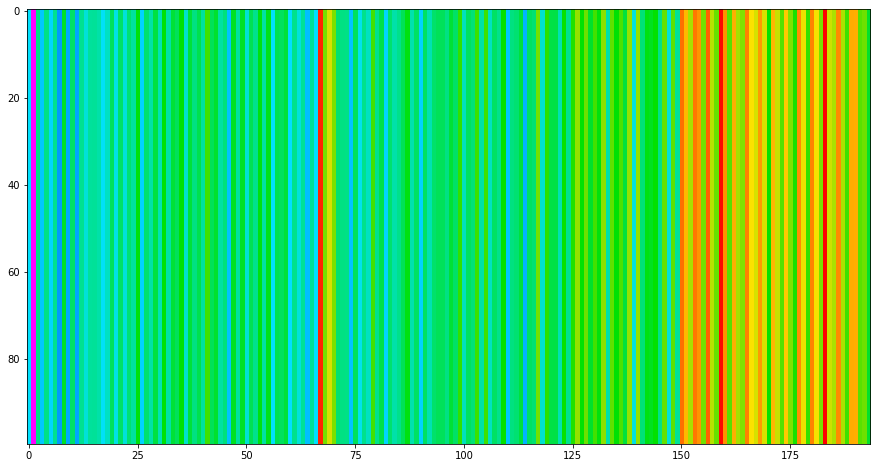

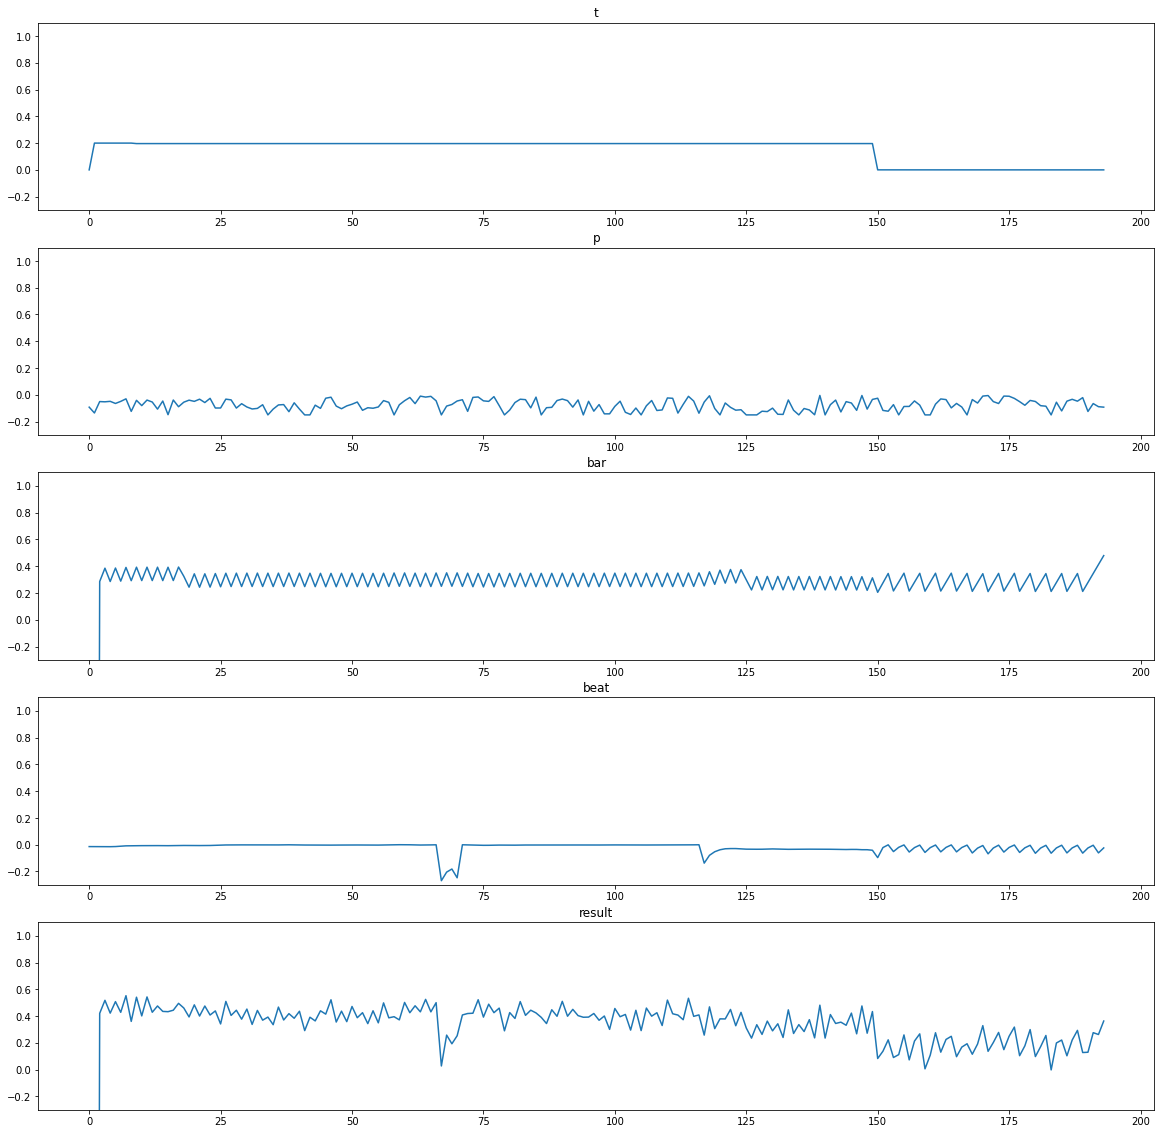

In [47]:
def get_current_colors(t, led_count=1):
    beat = get_current_beat(t)
    bar = get_current_bar(t)
    tatum = get_current_tatum(t)
    segment = get_current_segment(t)
    section = get_current_section(t)
    
    loudness = scale_section_loudness(section.get('loudness', -1))
    tempo = scale_section_tempo(section.get('tempo', -1))
    key = scale_section_key(section.get('key', -1))
    

    
    current_bar = (t - bar['start'] + bar['duration']) / bar['duration']
    current_beat = (t - beat['start'] + beat['duration']) / beat['duration']
    #beat_color = (t - beat['start'] + beat['duration']) / beat['duration']
    #timbre_colors = [p for p in segment['timbre']]
    #pitch_colors = [p for p in segment['pitches']]
    parts = {
        't': 0.2*tempo,
        'p': -0.15*segment['pitches'][0],
        'bar': 0.2*current_bar,
        'beat': 0.1*math.log10(current_beat%1)
    }
    h = sum(parts.values())
    parts['result']=h
    
    rgb = colorsys.hsv_to_rgb(h, 1, 1)
    p = _scale_pixel([255*p for p in rgb])
    colors = [p for _ in range(led_count)]
    return  colors, parts

from matplotlib import pyplot as plt
import numpy as np

duration = int(analysis['track']['duration'])

view = np.empty(shape=(100, duration, 3))
moments = {}
for i in range(0, duration):
    c, parts = get_current_colors(i)
    view[:, i, :] = np.array(c)/255
    for k, v in parts.items():
        if not k in moments:
            moments[k] = []
        moments[k].append(v)
    
fig = plt.figure(figsize=(20,8))
plt.imshow(view)
plt.show()

fig, ax = plt.subplots(figsize=(20,20), nrows=len(moments.keys()))
for i, k in enumerate(moments):
    ax[i].plot(np.arange(0, duration), moments[k])
    ax[i].set_title(k)
    ax[i].set_ylim(-0.3, 1.1)
plt.show()

                      